In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.patches import Rectangle
import pandas as pd
import sys
import matplotlib as mpl
from matplotlib import rc
from matplotlib.lines import Line2D
import scipy.stats
mpl.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 18})
#sns.reset_orig()

In [5]:
### constants
ev_to_ms = 0.332

In [6]:
### Load fastas
fa_16s = '/gstore/home/stephew3/nanoboth/nanomod_data/ec16s.fasta'
fa_23s = '/gstore/home/stephew3/nanoboth/nanomod_data/ec23s.fasta'
fa_18s = '/gstore/home/stephew3/nanoboth/nanomod_data/sc18s.fasta'
fa_25s = '/gstore/home/stephew3/nanoboth/nanomod_data/sc25s.fasta'


In [7]:
### function to process fasta turning DNA to RNA and return position indexed dataframe with sequence
def gen_seq(fa_path):
    target_seq = ''.join([line.rstrip() for line in open(fa_path,'r')][1:]).replace('T','U') ## RNA
    idx_ = np.arange(start=1, stop=len(target_seq)+1)
    seq_ = pd.DataFrame({'pos': idx_, 'seq': list(target_seq)})
    return seq_

seq16s = gen_seq(fa_16s)
seq23s = gen_seq(fa_23s)
seq18s = gen_seq(fa_18s)
seq25s = gen_seq(fa_25s)

In [8]:
base_path='/gstore/home/stephew3/nanoboth/nanomod_data/'

In [9]:
### coverage from tombo
cov_1623n_lsc = pd.read_csv(base_path+'1623n_lsc.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_1825n_lsc = pd.read_csv(base_path+'1825n_lsc.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_1623i_lsc = pd.read_csv(base_path+'1623i_lsc.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_1825i_lsc = pd.read_csv(base_path+'1825i_lsc.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')

In [10]:
### Mean dwell from tombo
len_16sn = 1538
len_18sn = 1796
len_16si = 1538
len_18si = 1796

dwell_16sn = pd.read_csv(base_path+'1623n_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'], nrows = len_16sn,  engine='python')
dwell_23sn = pd.read_csv(base_path+'1623n_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = len_16sn+3, names=['pos', 'dwell'],  engine='python')
dwell_18sn = pd.read_csv(base_path+'1825n_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'], nrows = len_18sn,  engine='python')
dwell_25sn = pd.read_csv(base_path+'1825n_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = len_18sn+3, names=['pos', 'dwell'],  engine='python')

dwell_16si = pd.read_csv(base_path+'1623i_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'], nrows = len_16si,  engine='python')
dwell_23si = pd.read_csv(base_path+'1623i_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = len_16si+3, names=['pos', 'dwell'],  engine='python')
dwell_18si = pd.read_csv(base_path+'1825i_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'], nrows = len_18si,  engine='python')
dwell_25si = pd.read_csv(base_path+'1825i_lsc.dwell.plus.wig', delim_whitespace=True, skiprows = len_18si+3, names=['pos', 'dwell'],  engine='python')

In [11]:
### Mean signal from tombo
sig_16sn = pd.read_csv(base_path+'1623n_lsc.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'], nrows = len_16sn,  engine='python')
sig_23sn = pd.read_csv(base_path+'1623n_lsc.signal.sample.plus.wig', delim_whitespace=True, skiprows = len_16sn+3, names=['pos', 'sig'],  engine='python')
sig_18sn = pd.read_csv(base_path+'1825n_lsc.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'], nrows = len_18sn,  engine='python')
sig_25sn = pd.read_csv(base_path+'1825n_lsc.signal.sample.plus.wig', delim_whitespace=True, skiprows = len_18sn+3, names=['pos', 'sig'],  engine='python')

sig_16si = pd.read_csv(base_path+'1623n_lsc.signal.control.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'], nrows = len_16si,  engine='python')
sig_23si = pd.read_csv(base_path+'1623n_lsc.signal.control.plus.wig', delim_whitespace=True, skiprows = len_16si+3, names=['pos', 'sig'],  engine='python')
sig_18si = pd.read_csv(base_path+'1825n_lsc.signal.control.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'], nrows = len_18si,  engine='python')
sig_25si = pd.read_csv(base_path+'1825n_lsc.signal.control.plus.wig', delim_whitespace=True, skiprows = len_18si+3, names=['pos', 'sig'],  engine='python')

In [12]:
### KS Statistic (current) native vs IVT (tombo)
len16stat = 1532
len18stat = 1792
stati_16s = pd.read_csv(base_path+'1623n_lsc.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names =['pos', 'stat'], nrows = len16stat, engine='python')
stati_23s = pd.read_csv(base_path+'1623n_lsc.statistic.plus.wig', delim_whitespace=True, skiprows = len16stat+3, names =['pos', 'stat'], engine='python')
stati_18s = pd.read_csv(base_path+'1825n_lsc.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names =['pos', 'stat'], nrows = len18stat, engine='python')
stati_25s = pd.read_csv(base_path+'1825n_lsc.statistic.plus.wig', delim_whitespace=True, skiprows = len18stat+3, names =['pos', 'stat'], engine='python')

### KS stat pval
pval_16s = pd.read_csv(base_path+'1623n_lsc_wpval.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names =['pos', 'pval'], nrows = len16stat, engine='python')
pval_23s = pd.read_csv(base_path+'1623n_lsc_wpval.statistic.plus.wig', delim_whitespace=True, skiprows = len16stat+3, names =['pos', 'pval'], engine='python')
pval_18s = pd.read_csv(base_path+'1825n_lsc_wpval.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names =['pos', 'pval'], nrows = len18stat, engine='python')
pval_25s = pd.read_csv(base_path+'1825n_lsc_wpval.statistic.plus.wig', delim_whitespace=True, skiprows = len18stat+3, names =['pos', 'pval'], engine='python')

### Read in the rRNA mods annotations
rrna_mods = pd.read_csv(base_path+'rrna_mods_v6.csv')


### KS Statistic (dwell) native vs IVT (from Busan script) --> need to double check the positions, and the distributions with another notebook...
statd_16s = pd.read_csv(base_path+'16s_ks-statistic.txt', delimiter = ' ', names =['pos', 'stat'], engine='python')
statd_23s = pd.read_csv(base_path+'23s_ks-statistic.txt', delimiter = ' ', names =['pos', 'stat'], engine='python')
statd_18s = pd.read_csv(base_path+'18s_ks-statistic.txt', delimiter = ' ', names =['pos', 'stat'], engine='python')
statd_25s = pd.read_csv(base_path+'25s_ks-statistic.txt', delimiter = ' ', names =['pos', 'stat'], engine='python')



In [13]:
### nanopolish data - Roham Razgazhi - Timp Lab
nanop_16s = pd.read_csv(base_path+'ecoli16S.tsv', delimiter = '\t', engine='python')
nanop_23s = pd.read_csv(base_path+'ecoli23S.tsv', delimiter = '\t', engine='python')
nanop_18s = pd.read_csv(base_path+'sc18S.tsv', delimiter = '\t', engine='python')
nanop_25s = pd.read_csv(base_path+'sc25S.tsv', delimiter = '\t', engine='python')

nanop_25s.head()

,contig,position,kmer,num_reads_ivt,num_reads_native,ks_signal,ks_signal_pval,ttest_signal,ttest_signal_pval,signal_shapiro_ivt,...,ks_dwell,ks_dwell_pval,ttest_dwell,ttest_dwell_pval,dwell_mean_ivt,dwell_mean_native,dwell_median_ivt,dwell_median_native,dwell_std_ivt,dwell_std_native
0,sc25S,1,GUUUG,10,67,0.416418,0.071505,-1.783535,0.103876,0.965016,...,0.258209,5.175582e-01,0.320895,0.752428,8.963000,9.532836,7.465,6.64,4.838799,7.375752
1,sc25S,2,UUUGA,22,130,0.295105,0.059659,-1.169544,0.252601,0.933097,...,0.102797,9.745001e-01,-0.849796,0.404488,17.942273,12.704769,9.465,9.63,28.490446,11.903186
2,sc25S,3,UUGAC,24,137,0.199818,0.336659,-1.204601,0.238080,0.915075,...,0.115572,9.145955e-01,-0.534894,0.596483,10.982500,9.356423,6.805,7.30,13.753111,13.652015
3,sc25S,4,UGACC,28,139,0.121274,0.832502,-0.171082,0.865191,0.944050,...,0.234327,1.256579e-01,-1.328939,0.194930,26.985357,9.365036,7.305,7.30,70.064630,8.135234
4,sc25S,5,GACCU,67,151,0.085302,0.851894,0.197026,0.844115,0.962168,...,0.396461,4.764519e-07,-4.390988,0.000038,22.327313,8.488477,12.280,6.97,25.234648,8.044578


In [14]:
print(pval_16s.head())
print(stati_16s.head())

   pos      pval
0    7  111.6896
1    8  142.3457
2    9  145.2219
3   10  145.2219
4   11  145.2219
   pos    stat
0    7  0.2085
1    8  0.1851
2    9  0.1382
3   10  0.0821
4   11  0.0849


In [15]:
cov_16sn = cov_1623n_lsc.loc[cov_1623n_lsc['ref'] =='ecoli16S']
cov_23sn = cov_1623n_lsc.loc[cov_1623n_lsc['ref'] =='ecoli23S']

cov_18sn = cov_1825n_lsc.loc[cov_1825n_lsc['ref'] =='yeast18S']
cov_25sn = cov_1825n_lsc.loc[cov_1825n_lsc['ref'] =='yeast25S']


cov_16si = cov_1623i_lsc.loc[cov_1623i_lsc['ref'] =='ecoli16S']
cov_23si = cov_1623i_lsc.loc[cov_1623i_lsc['ref'] =='ecoli23S']

cov_18si = cov_1825i_lsc.loc[cov_1825i_lsc['ref'] =='yeast18S']
cov_25si = cov_1825i_lsc.loc[cov_1825i_lsc['ref'] =='yeast25S']

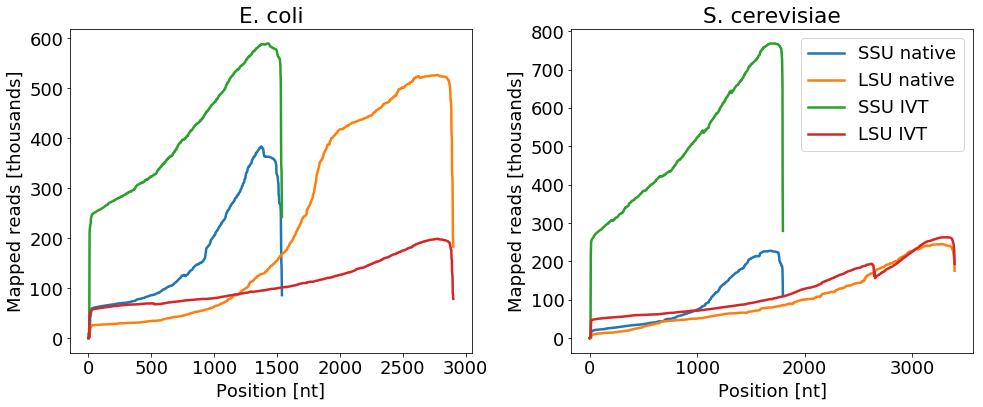

In [16]:
## Plot of read coverage for rRNA from E. coli and S. cerevisiae (IVT and native)
read_sc = 0.001
lw = 2.5

fig1, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(cov_16sn['pos'], cov_16sn['cov']*read_sc, linewidth=lw, label='SSU native')
axs[0].plot(cov_23sn['pos'], cov_23sn['cov']*read_sc, linewidth=lw, label='LSU native')
axs[0].plot(cov_16si['pos'], cov_16si['cov']*read_sc, linewidth=lw, label='SSU IVT')
axs[0].plot(cov_23si['pos'], cov_23si['cov']*read_sc, linewidth=lw, label='LSU IVT')
axs[0].set_title('E. coli')

axs[1].plot(cov_18sn['pos'], cov_18sn['cov']*read_sc, linewidth=lw, label='SSU native')
axs[1].plot(cov_25sn['pos'], cov_25sn['cov']*read_sc, linewidth=lw, label='LSU native')
axs[1].plot(cov_18si['pos'], cov_18si['cov']*read_sc, linewidth=lw, label='SSU IVT')
axs[1].plot(cov_25si['pos'], cov_25si['cov']*read_sc, linewidth=lw, label='LSU IVT')
axs[1].set_title('S. cerevisiae')

_ = axs[1].legend()
axs[0].set_ylabel('Mapped reads [thousands]')
axs[1].set_ylabel('Mapped reads [thousands]')
axs[0].set_xlabel('Position [nt]')
axs[1].set_xlabel('Position [nt]')
fig1.tight_layout()
#fig1.savefig('plots/map_cov_v1.pdf')

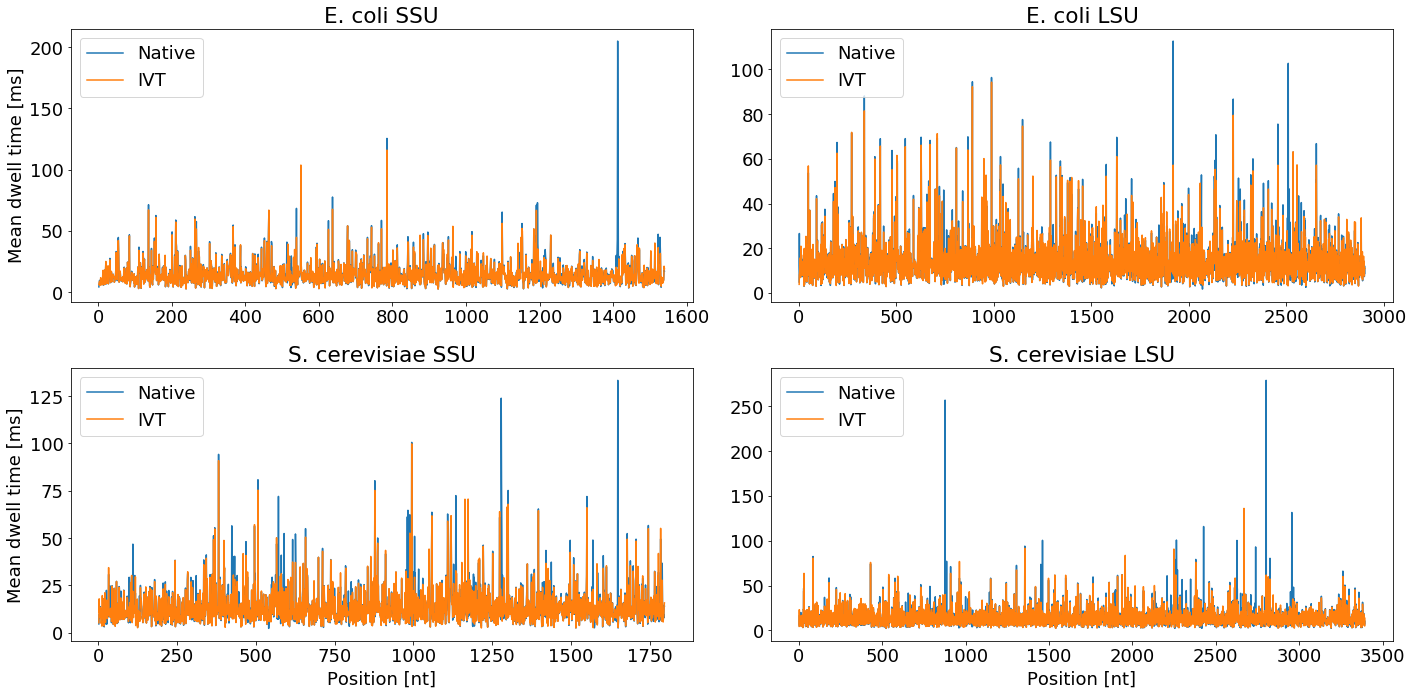

In [17]:
## Plot of mean dwell time across all positions for rRNA from E. coli and S. cerevisiae (IVT and native)
fig2, axs = plt.subplots(2,2, figsize = (20,10))
axs[0,0].plot(dwell_16sn['pos'], dwell_16sn['dwell']*ev_to_ms, label ='Native')
axs[0,0].plot(dwell_16si['pos'], dwell_16si['dwell']*ev_to_ms, label ='IVT')
axs[0,0].set_title('E. coli SSU')
axs[0,0].legend(loc='upper left')

axs[0,1].plot(dwell_23sn['pos'], dwell_23sn['dwell']*ev_to_ms, label ='Native')
axs[0,1].plot(dwell_23si['pos'], dwell_23si['dwell']*ev_to_ms, label ='IVT')
axs[0,1].set_title('E. coli LSU')
axs[0,1].legend(loc='upper left')

axs[1,0].plot(dwell_18sn['pos'], dwell_18sn['dwell']*ev_to_ms, label ='Native')
axs[1,0].plot(dwell_18si['pos'], dwell_18si['dwell']*ev_to_ms, label ='IVT')
axs[1,0].set_title('S. cerevisiae SSU')
axs[1,0].legend(loc='upper left')

axs[1,1].plot(dwell_25sn['pos'], dwell_25sn['dwell']*ev_to_ms, label ='Native')
axs[1,1].plot(dwell_25si['pos'], dwell_25si['dwell']*ev_to_ms, label ='IVT')
axs[1,1].set_title('S. cerevisiae LSU')
axs[1,1].legend(loc='upper left')

_=axs[1,0].set_xlabel('Position [nt]')
_=axs[1,1].set_xlabel('Position [nt]')
_=axs[1,0].set_ylabel('Mean dwell time [ms]')
_=axs[0,0].set_ylabel('Mean dwell time [ms]')
#_=axs[0,0].set_xlim(1390, 1440)
#_=axs[0,1].set_xlim(1900, 2000)
#_=axs[1,1].set_xlim(895, 920)
#_=axs[1,1].set_xlim(1840, 1920)
#_=axs[1,1].set_xlim(2780,2850) ### really nice representation of additive effect of purine content and 2-O-methyl
fig2.tight_layout()
#fig2.savefig('plots/mean_dwell_all_v1.pdf')

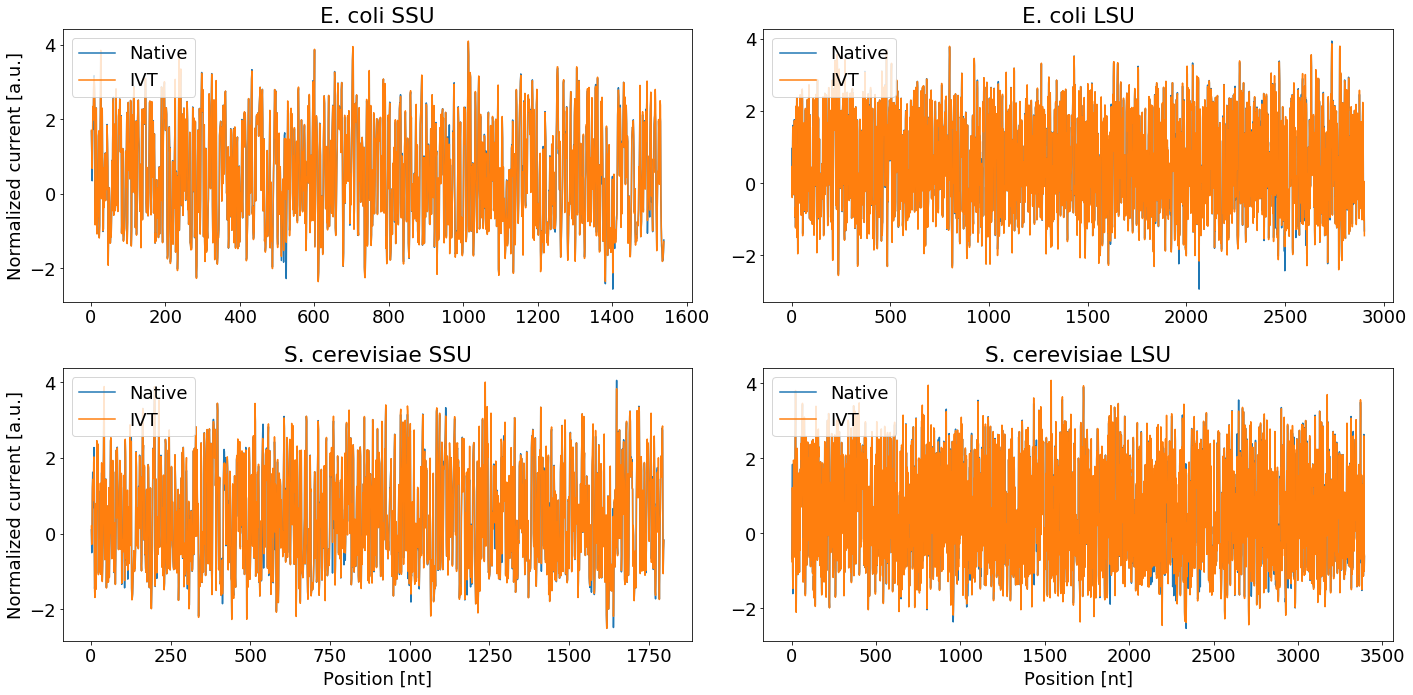

In [18]:
## Plot of tombo normalized current across all positions for rRNA from E. coli and S. cerevisiae (IVT and native)
fig3, axs = plt.subplots(2,2, figsize = (20,10))
axs[0,0].plot(sig_16sn['pos'], sig_16sn['sig'], label ='Native')
axs[0,0].plot(sig_16si['pos'], sig_16si['sig'], label ='IVT')
axs[0,0].set_title('E. coli SSU')
axs[0,0].legend(loc='upper left')

axs[0,1].plot(sig_23sn['pos'], sig_23sn['sig'], label ='Native')
axs[0,1].plot(sig_23si['pos'], sig_23si['sig'], label ='IVT')
axs[0,1].set_title('E. coli LSU')
axs[0,1].legend(loc='upper left')

axs[1,0].plot(sig_18sn['pos'], sig_18sn['sig'], label ='Native')
axs[1,0].plot(sig_18si['pos'], sig_18si['sig'], label ='IVT')
axs[1,0].set_title('S. cerevisiae SSU')
axs[1,0].legend(loc='upper left')

axs[1,1].plot(sig_25sn['pos'], sig_25sn['sig'], label ='Native')
axs[1,1].plot(sig_25si['pos'], sig_25si['sig'], label ='IVT')
axs[1,1].set_title('S. cerevisiae LSU')
axs[1,1].legend(loc='upper left')

_=axs[1,0].set_xlabel('Position [nt]')
_=axs[1,1].set_xlabel('Position [nt]')
_=axs[1,0].set_ylabel('Normalized current [a.u.]')
_=axs[0,0].set_ylabel('Normalized current [a.u.]')
fig3.tight_layout()
#fig3.savefig('plots/mean_curr_all_v1.pdf')

In [19]:
mods_16s = rrna_mods[rrna_mods['chrom']=='ec16s']
mods_16s = mods_16s.reset_index(drop=True)
mods_23s = rrna_mods[rrna_mods['chrom']=='ec23s']
mods_23s = mods_23s.reset_index(drop=True)
mods_18s = rrna_mods[rrna_mods['chrom']=='sc18s']
mods_18s = mods_18s.reset_index(drop=True)
mods_25s = rrna_mods[rrna_mods['chrom']=='sc25s']
mods_25s = mods_25s.reset_index(drop=True)

In [20]:
## Functions to overlay colored lines on plots for the different known modifcations (base [non-pseudouridine], pseudouridine, 2'-O-me) in rRNA
def overlay_mods(mod_set, ax_ind1, axv_alpha, axv_color, axv_lw):
    for i in range(len(mod_set)):
        xc = mod_set['pos'][i]
        if mod_set['modtype'][i] == 'base':
            axs[ax_ind1].axvline(x=xc, color=axv_color[0], alpha = axv_alpha, linewidth=axv_lw)
        if mod_set['modtype'][i] == 'Nm':
            axs[ax_ind1].axvline(x=xc, color=axv_color[1], alpha = axv_alpha, linewidth=axv_lw)
        if mod_set['modtype'][i] == 'Y':
            axs[ax_ind1].axvline(x=xc, color=axv_color[2], alpha = axv_alpha, linewidth=axv_lw)

def overlay_mods_2inds(mod_set, ax_ind1, ax_ind2, axv_alpha, axv_color, axv_lw):
    for i in range(len(mod_set)):
        xc = mod_set['pos'][i]
        if mod_set['modtype'][i] == 'base':
            axs[ax_ind1,ax_ind2].axvline(x=xc, color=axv_color[0], alpha = axv_alpha, linewidth=axv_lw, ls='-')
        if mod_set['modtype'][i] == 'Nm':
            axs[ax_ind1,ax_ind2].axvline(x=xc, color=axv_color[1], alpha = axv_alpha, linewidth=axv_lw, ls='-')
        if mod_set['modtype'][i] == 'Y':
            axs[ax_ind1,ax_ind2].axvline(x=xc, color=axv_color[2], alpha = axv_alpha, linewidth=axv_lw, ls='-') 
                 
diff_sig_16s = sig_16sn['sig'] - sig_16si['sig']
diff_sig_23s = sig_23sn['sig'] - sig_23si['sig']
diff_sig_18s = sig_18sn['sig'] - sig_18si['sig']
diff_sig_25s = sig_25sn['sig'] - sig_25si['sig']
         
diff_dwell_16s = dwell_16sn['dwell'] - dwell_16si['dwell']
diff_dwell_23s = dwell_23sn['dwell'] - dwell_23si['dwell']
diff_dwell_18s = dwell_18sn['dwell'] - dwell_18si['dwell']
diff_dwell_25s = dwell_25sn['dwell'] - dwell_25si['dwell']

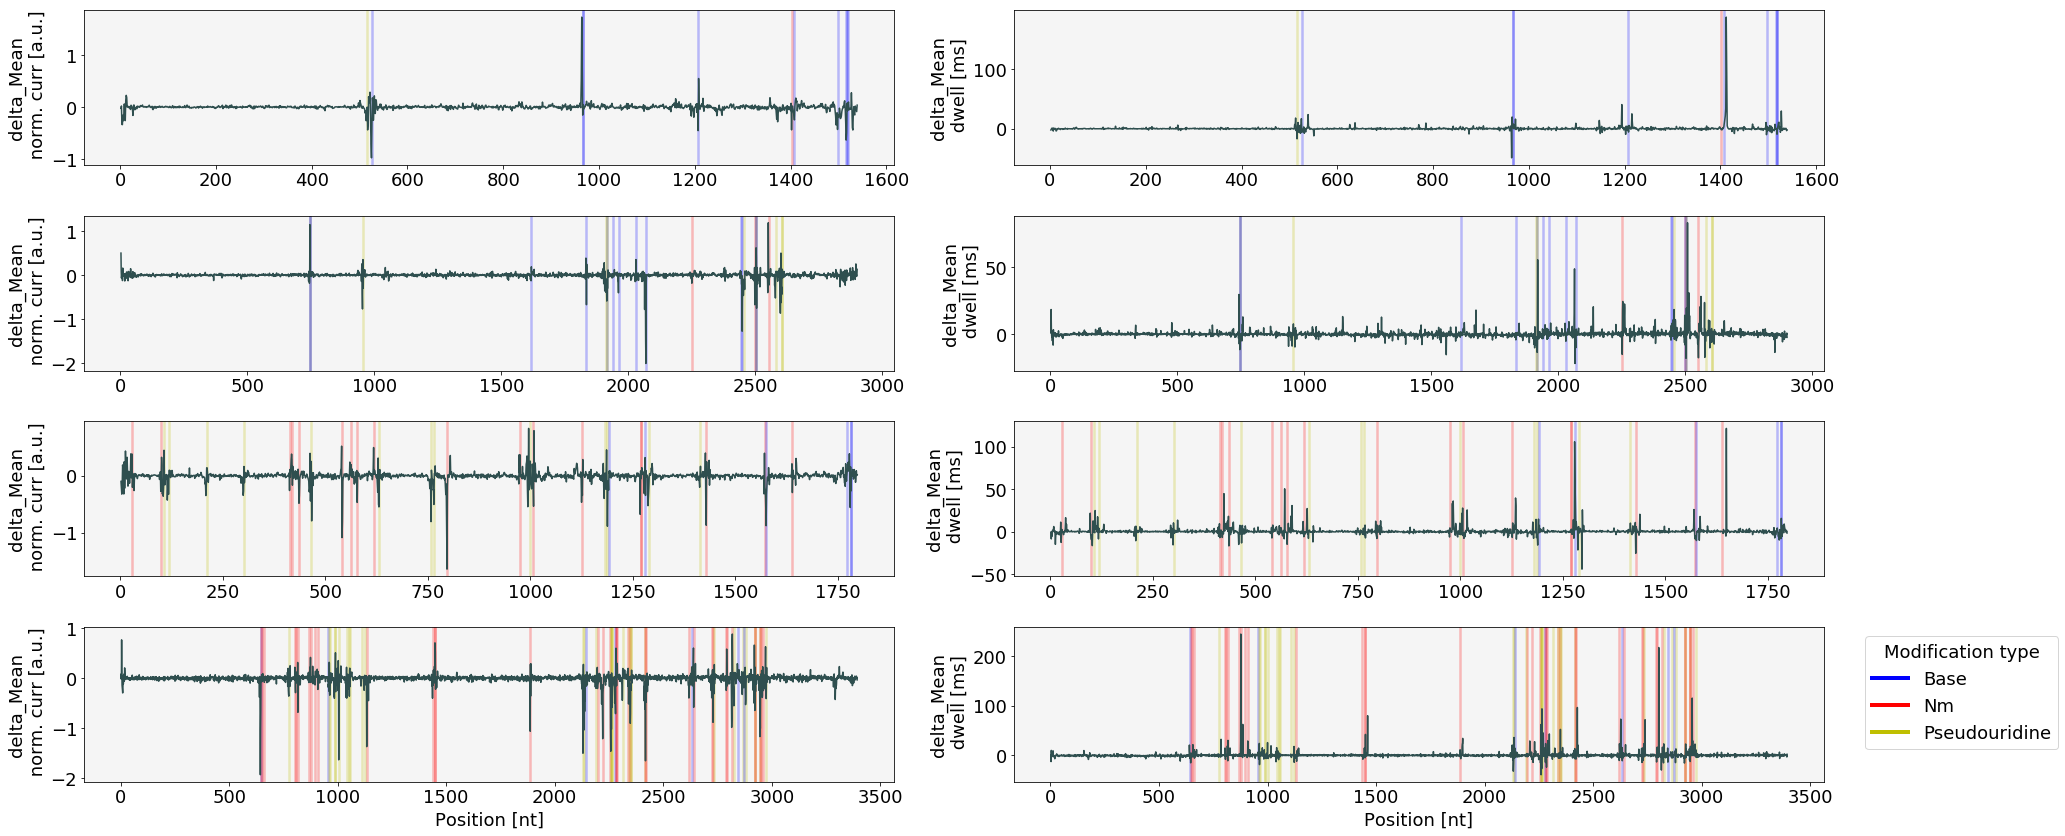

In [21]:
## Plot of changes in mean normalized current and dwell time across all positions for rRNA from E. coli and S. cerevisiae (IVT and native)
axv_alpha = 0.25
#axv_color = ['tab:red', 'tab:blue', 'tab:green'] # Red = base modification, Orange = Nm, Green = Base and Nm (only ec1402)
axv_color = ['b', 'r', 'y']
axv_lw = 2.5

line_color = 'tab:blue'
line_color = 'darkslategrey'
#line_color = 'limegreen'
line_alpha = 1.0

fig5, axs = plt.subplots(4,2, figsize = (26,12))
overlay_mods_2inds(mods_16s, 0,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_23s, 1,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_18s, 2,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_25s, 3,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_16s, 0,1, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_23s, 1,1, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_18s, 2,1, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_25s, 3,1, axv_alpha,axv_color, axv_lw)


axs[0,0].plot(sig_16sn['pos'], diff_sig_16s, color = line_color, label ='Native')
axs[1,0].plot(sig_23sn['pos'], diff_sig_23s, color = line_color, label ='Native')
axs[2,0].plot(sig_18sn['pos'], diff_sig_18s, color = line_color, label ='Native')
axs[3,0].plot(sig_25sn['pos'], diff_sig_25s, color = line_color, label ='Native')

axs[0,1].plot(dwell_16sn['pos'], diff_dwell_16s*ev_to_ms, color = line_color, label ='Native')
axs[1,1].plot(dwell_23sn['pos'], diff_dwell_23s*ev_to_ms, color = line_color, label ='Native')
axs[2,1].plot(dwell_18sn['pos'], diff_dwell_18s*ev_to_ms, color = line_color, label ='Native')
axs[3,1].plot(dwell_25sn['pos'], diff_dwell_25s*ev_to_ms, color = line_color, label ='Native')

_=axs[3,0].set_xlabel('Position [nt]')
_=axs[3,1].set_xlabel('Position [nt]')

_=axs[0,0].set_ylabel('delta_Mean\n norm. curr [a.u.]')
_=axs[1,0].set_ylabel('delta_Mean\n norm. curr [a.u.]')
_=axs[2,0].set_ylabel('delta_Mean\n norm. curr [a.u.]')
_=axs[3,0].set_ylabel('delta_Mean\n norm. curr [a.u.]')

_=axs[0,1].set_ylabel('delta_Mean\n dwell [ms]')
_=axs[1,1].set_ylabel('delta_Mean\n dwell [ms]')
_=axs[2,1].set_ylabel('delta_Mean\n dwell [ms]')
_=axs[3,1].set_ylabel('delta_Mean\n dwell [ms]')

custom_lines = [Line2D([0], [0], color=axv_color[0], lw=4),
                Line2D([0], [0], color=axv_color[1], lw=4),
                Line2D([0], [0], color=axv_color[2], lw=4)]
axs[3,1].legend(custom_lines, ['Base', 'Nm', 'Pseudouridine'], bbox_to_anchor=(1.04,1), \
                loc="upper left", title='Modification type')

axs[0,0].set_facecolor('whitesmoke')
axs[1,0].set_facecolor('whitesmoke')
axs[2,0].set_facecolor('whitesmoke')
axs[3,0].set_facecolor('whitesmoke')
axs[0,1].set_facecolor('whitesmoke')
axs[1,1].set_facecolor('whitesmoke')
axs[2,1].set_facecolor('whitesmoke')
axs[3,1].set_facecolor('whitesmoke')

fig5.tight_layout()
#fig5.savefig('del_curr_dwell_v1.pdf')

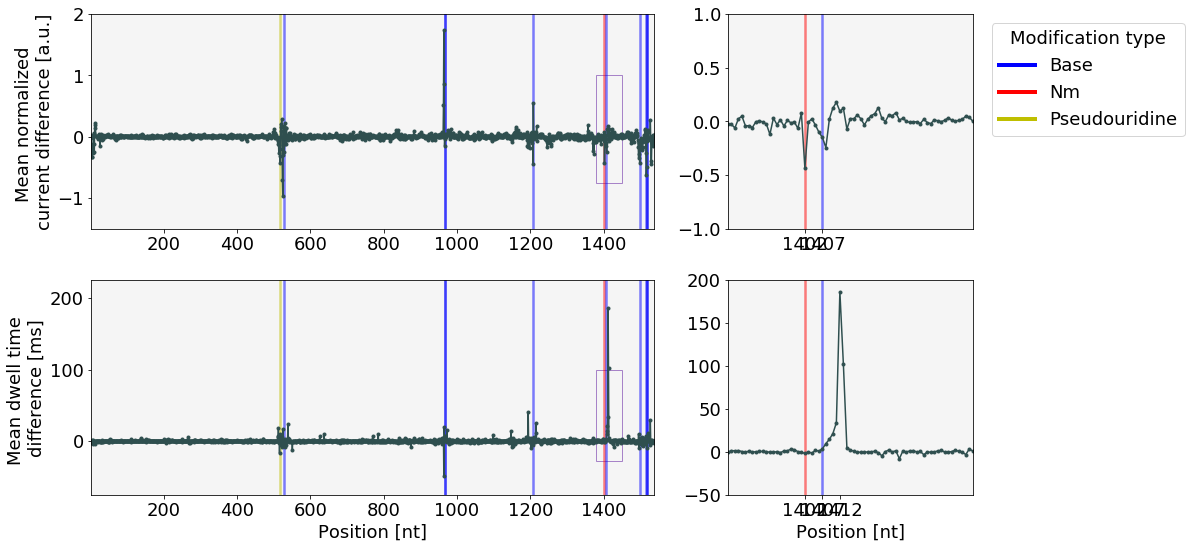

In [22]:
## Plot of changes in mean normalized current and dwell time for the 1402 m4Cm modification in 16S rRNA from E. coli

import matplotlib.gridspec as gridspec

line_color = 'darkslategrey'
axv_color = ['b', 'r', 'y']
axv_alpha = 0.50
fig6 = plt.figure(figsize=(14,8))
ymax_sig = 2
ymin_sig = -1.5
xmax = len(diff_sig_16s)
xmin = 2

ymin_dwell = -55
ymax_dwell = 200

xmin_box = 1380
xmax_box = 1450

gs = gridspec.GridSpec(2, 3)
axs = [plt.subplot2grid((2,3),(0,0), colspan=2), plt.subplot2grid((2,3),(0,2), colspan=1), plt.subplot2grid((2,3),(1,0), colspan=2), plt.subplot2grid((2,3),(1,2), colspan=1)]
axs[0].add_patch(Rectangle((xmin_box, ymin_sig/2), xmax_box-xmin_box, (ymax_sig-ymin_sig)/2, alpha=0.8, fill=False, color = 'tab:purple'))
axs[0].set_xlim(xmin, xmax)
axs[0].set_ylim(ymin_sig, ymax_sig)
axs[1].set_xlim(xmin, xmax)
axs[1].set_ylim(ymin_sig, ymax_sig)

axs[2].add_patch(Rectangle((xmin_box, ymin_dwell/2), xmax_box-xmin_box, (ymax_dwell-ymin_dwell)/2, alpha=0.8, fill=False, color = 'tab:purple'))
axs[2].set_xlim(xmin, xmax)
axs[2].set_ylim(ymin_dwell, ymax_dwell)
axs[3].set_xlim(xmin, xmax)
axs[3].set_ylim(ymin_dwell, ymax_dwell)

for i in range(len(axs)):
    axs[i].set_facecolor('whitesmoke')
    

overlay_mods(mods_16s, 0, axv_alpha,axv_color, axv_lw)
overlay_mods(mods_16s, 1, axv_alpha,axv_color, axv_lw)
overlay_mods(mods_16s, 2, axv_alpha,axv_color, axv_lw)
overlay_mods(mods_16s, 3, axv_alpha,axv_color, axv_lw)
axs[0].plot(sig_16sn['pos'], diff_sig_16s, '.-', color = line_color)

axs[1].plot(sig_16sn['pos'], diff_sig_16s, '.-', color = line_color)
axs[1].set_xlim(xmin_box, xmax_box)
axs[1].set_ylim(-1, 1)
axs[1].set_xticks([1402, 1407])
axs[2].plot(dwell_16sn['pos'], diff_dwell_16s*ev_to_ms, '.-', color = line_color)
axs[3].plot(dwell_16sn['pos'], diff_dwell_16s*ev_to_ms, '.-', color = line_color)
axs[3].set_xlim(xmin_box, xmax_box)
axs[0].set_xlim(xmin,xmax)
axs[2].set_xlim(xmin,xmax)
axs[2].set_ylim(-75, 225)
axs[0].set_ylabel('Mean normalized \ncurrent difference [a.u.]')
axs[2].set_ylabel('Mean dwell time \ndifference [ms]')
axs[2].set_xlabel('Position [nt]')
axs[3].set_xlabel('Position [nt]')
axs[3].set_xticks([1402, 1407, 1412])
axs[3].set_ylim(-50,200)
custom_lines = [Line2D([0], [0], color=axv_color[0], lw=4),
                Line2D([0], [0], color=axv_color[1], lw=4),
                Line2D([0], [0], color=axv_color[2], lw=4)]
axs[1].legend(custom_lines, ['Base', 'Nm', 'Pseudouridine'], bbox_to_anchor=(1.04,1), \
                loc="upper left", title='Modification type')
# --> reasoning for the m5C not causing the large dwell peak is there is another m5C in SSU from EC -> no major dwell peak! --> must be 2-O-me

fig6.tight_layout()
#fig31.savefig('plots/ec1402_Nm_v1.pdf')

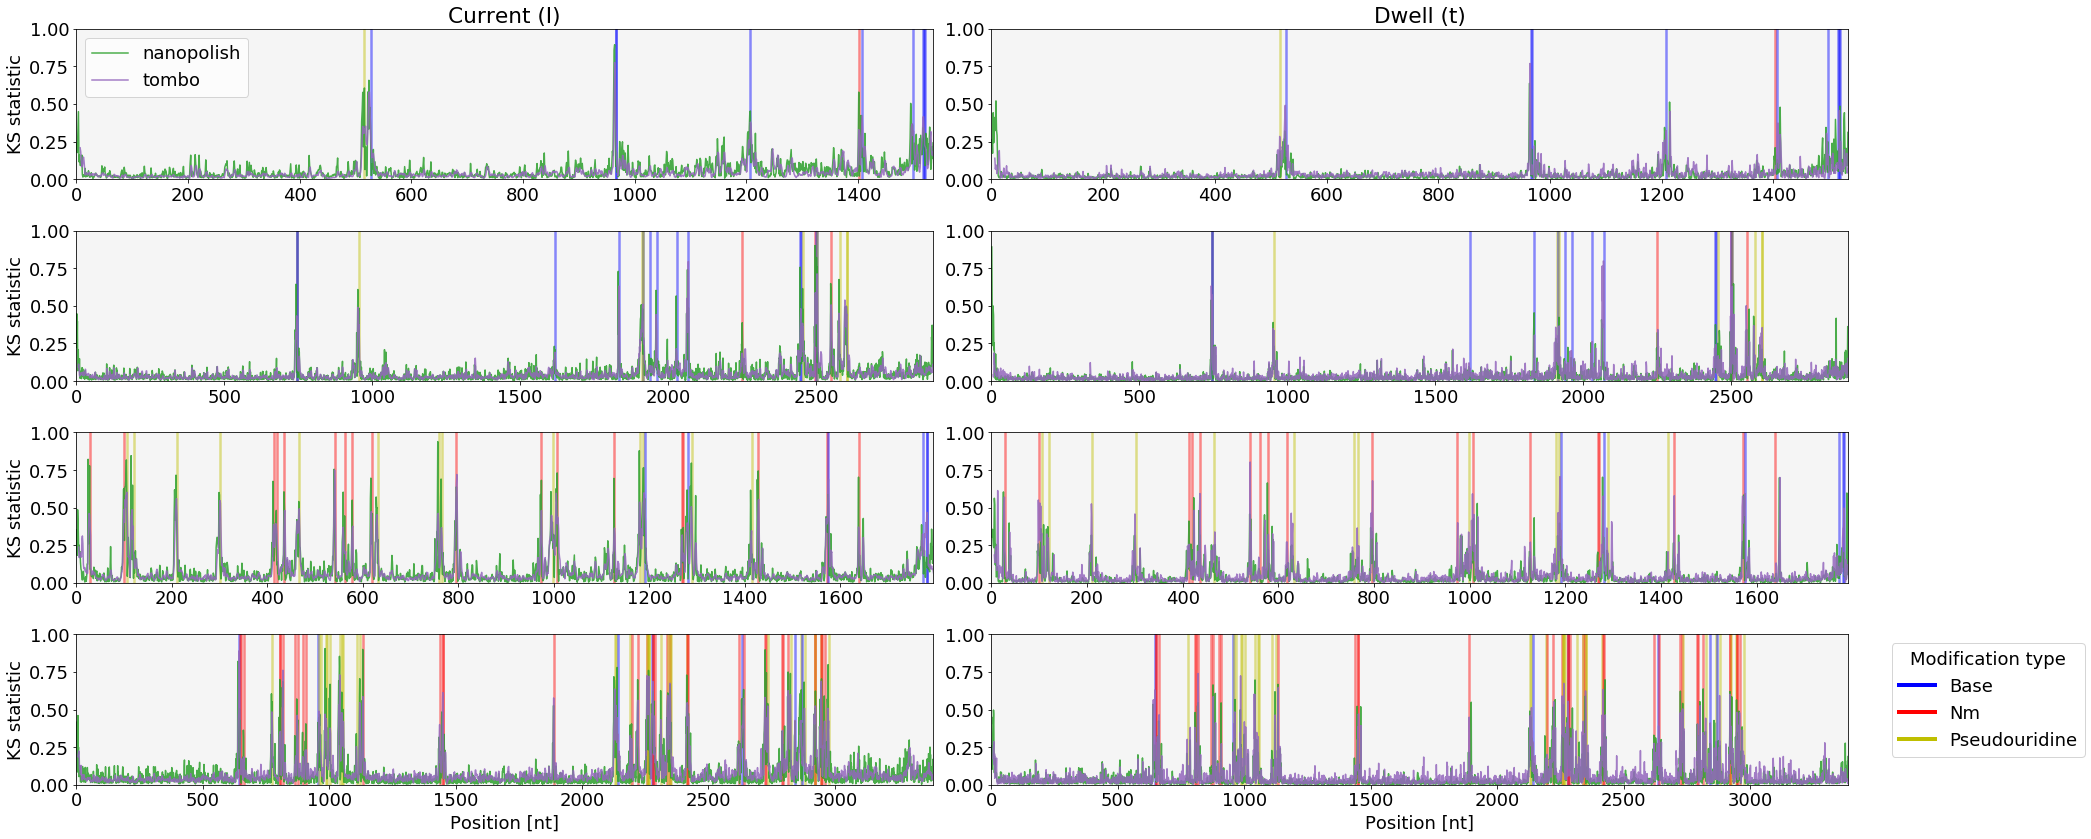

In [23]:
## Plot of KS effect size across current and dwell time for all rRNA using both tombo and nanopolish
## Known modifications are overlaid as colored lines

line_color='darkslategrey'
line_color_np = 'cadetblue'
line_color_np='tab:green'
axv_alpha = 0.45
line_color = 'darkslategrey'
line_color='tab:purple'
axv_color = ['b', 'r', 'y']
line_alpha=0.85


fig7, axs = plt.subplots(4,2, figsize=(26, 12))
overlay_mods_2inds(mods_16s, 0,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_23s, 1,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_18s, 2,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_25s, 3,0, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_16s, 0,1, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_23s, 1,1, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_18s, 2,1, axv_alpha,axv_color, axv_lw)
overlay_mods_2inds(mods_25s, 3,1, axv_alpha,axv_color, axv_lw)

axs[0,0].plot(nanop_16s['position'], nanop_16s['ks_signal'], color=line_color_np,alpha= line_alpha, label= 'nanopolish')
axs[0,0].plot(stati_16s['pos'], stati_16s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')

axs[1,0].plot(nanop_23s['position'], nanop_23s['ks_signal'], color=line_color_np,alpha= line_alpha, label='nanopolish')
axs[1,0].plot(stati_23s['pos'], stati_23s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')

axs[2,0].plot(nanop_18s['position'], nanop_18s['ks_signal'], color =line_color_np,alpha= line_alpha, label='nanopolish')
axs[2,0].plot(stati_18s['pos'], stati_18s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')

axs[3,0].plot(nanop_25s['position'], nanop_25s['ks_signal'], color=line_color_np,alpha= line_alpha, label='nanopolish')
axs[3,0].plot(stati_25s['pos'], stati_25s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')


axs[0,1].plot(nanop_16s['position'], nanop_16s['ks_dwell'], color=line_color_np, alpha= line_alpha, label='nanopolish')
axs[0,1].plot(statd_16s['pos'], statd_16s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')

axs[1,1].plot(nanop_23s['position'], nanop_23s['ks_dwell'], color=line_color_np,alpha= line_alpha, label='nanopolish')
axs[1,1].plot(statd_23s['pos'], statd_23s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')

axs[2,1].plot(nanop_18s['position'], nanop_18s['ks_dwell'], color=line_color_np,alpha= line_alpha, label='nanopolish')
axs[2,1].plot(statd_18s['pos'], statd_18s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')

axs[3,1].plot(nanop_25s['position'], nanop_25s['ks_dwell'], color=line_color_np,alpha= line_alpha, label='nanopolish')
axs[3,1].plot(statd_25s['pos'], statd_25s['stat'], color = line_color, alpha= line_alpha, label = 'tombo')

axs[0,0].set_xlim(0,len(stati_16s['pos'])+2)
axs[1,0].set_xlim(0,len(stati_23s['pos'])+2)
axs[2,0].set_xlim(0,len(stati_18s['pos'])+2)
axs[3,0].set_xlim(0,len(stati_25s['pos'])+2)

axs[0,0].set_facecolor('whitesmoke')
axs[1,0].set_facecolor('whitesmoke')
axs[2,0].set_facecolor('whitesmoke')
axs[3,0].set_facecolor('whitesmoke')
axs[0,1].set_facecolor('whitesmoke')
axs[1,1].set_facecolor('whitesmoke')
axs[2,1].set_facecolor('whitesmoke')
axs[3,1].set_facecolor('whitesmoke')

axs[0,1].set_xlim(0,len(statd_16s['pos'])+2)
axs[1,1].set_xlim(0,len(statd_23s['pos'])+2)
axs[2,1].set_xlim(0,len(statd_18s['pos'])+2)
axs[3,1].set_xlim(0,len(statd_25s['pos'])+2)

axs[0,0].set_title('Current (I)')
axs[0,1].set_title('Dwell (t)')

axs[0,0].set_ylabel('KS statistic')
axs[1,0].set_ylabel('KS statistic')
axs[2,0].set_ylabel('KS statistic')
axs[3,0].set_ylabel('KS statistic')

axs[3,0].set_xlabel('Position [nt]')
axs[3,1].set_xlabel('Position [nt]')

for i, ax in enumerate(fig7.axes):
    ax.set_ylim(0,1)

    
custom_lines = [Line2D([0], [0], color=axv_color[0], lw=4),
                Line2D([0], [0], color=axv_color[1], lw=4),
                Line2D([0], [0], color=axv_color[2], lw=4)]
axs[3,1].legend(custom_lines, ['Base', 'Nm', 'Pseudouridine'], bbox_to_anchor=(1.04,1), \
                loc="upper left", title='Modification type')
    
axs[0,0].legend()
    
#axs[0,0].set_xlim(195, 300)    
#axs[0,1].set_xlim(1100, 1200)  
#axs[1,0].set_xlim(1700, 1800)
#axs[2,0].set_xlim(750, 850)

#axs[1,0].set_xlim(2540, 2570)
#axs[3,1].set_xlim(3260, 3335)
#axs[1,0].set_xlim(2480, 2520)
#axs[2,1].set_xlim(450, 480)

#axs[3,0].set_xlim(550, 1150)
#axs[3,1].set_xlim(1130, 1160)
#axs[3,0].set_xlim(2380, 2425)
#axs[3,1].set_xlim(3200, 3450)
#axs[2,0].set_xlim(1390, 1430)
#axs[2,1].set_xlim(1390, 1430)

#axs[1,0].set_xlim(2525, 2575)
#axs[1,1].set_xlim(2525, 2575)
#axs[3,0].set_xlim(3200, 3450)
#axs[3,1].set_xlim(1870, 1900)
#axs[2,0].set_xlim(1150, 1230)
fig7.tight_layout()
#fig7.savefig('plots/ks_all_v2.pdf')


In [24]:
## Function to generate position indexed dataframe from the tombo KS current output
def gen_df_tm_i(df_in):
    ex_vals = df_in['pos'].values
    front_x = np.arange(start=1, stop=df_in['pos'][0], step=1)
    adj_ind = np.append(front_x, ex_vals)
    
    front_y  = np.zeros(len(front_x))
    ey_vals  = df_in['stat'].values
    adj_stat = np.append(front_y, ey_vals)
    
    df_out = pd.DataFrame({'tm_ks':adj_stat}, index=adj_ind)
    
    return df_out

# Ecoli 16S - current
df_16_i_np = pd.DataFrame({'np_ks':nanop_16s['ks_signal']}, index=nanop_16s['position']) 
df_16_i_tm = gen_df_tm_i(stati_16s)
lit_mods_16 = pd.DataFrame({'lit':np.ones(len(mods_16s['pos']))}, index=mods_16s['pos'])
result_16 = pd.concat([df_16_i_np, df_16_i_tm, lit_mods_16], axis=1)
result_16['np_ks'] = result_16['np_ks'].shift(1)
result_16.fillna(value=0.0, inplace=True)


# Ecoli 23S - current
df_23_i_np = pd.DataFrame({'np_ks':nanop_23s['ks_signal']}, index=nanop_23s['position']) 
df_23_i_tm = gen_df_tm_i(stati_23s)
lit_mods_23 = pd.DataFrame({'lit':np.ones(len(mods_23s['pos']))}, index=mods_23s['pos'])
result_23 = pd.concat([df_23_i_np, df_23_i_tm, lit_mods_23], axis=1)
result_23['np_ks'] = result_23['np_ks'].shift(1)
result_23.fillna(value=0.0, inplace=True)


# SC 18S - current
df_18_i_np = pd.DataFrame({'np_ks':nanop_18s['ks_signal']}, index=nanop_18s['position']) 
df_18_i_tm = gen_df_tm_i(stati_18s)
lit_mods_18 = pd.DataFrame({'lit':np.ones(len(mods_18s['pos']))}, index=mods_18s['pos'])
result_18 = pd.concat([df_18_i_np, df_18_i_tm, lit_mods_18], axis=1)
result_18['np_ks'] = result_18['np_ks'].shift(1)
result_18.fillna(value=0.0, inplace=True)


# SC 25S - current
df_25_i_np = pd.DataFrame({'np_ks':nanop_25s['ks_signal']}, index=nanop_25s['position']) 
df_25_i_tm = gen_df_tm_i(stati_25s)
lit_mods_25 = pd.DataFrame({'lit':np.ones(len(mods_25s['pos']))}, index=mods_25s['pos'])
result_25 = pd.concat([df_25_i_np, df_25_i_tm, lit_mods_25], axis=1)
result_25['np_ks'] = result_25['np_ks'].shift(1)
result_25.fillna(value=0.0, inplace=True)


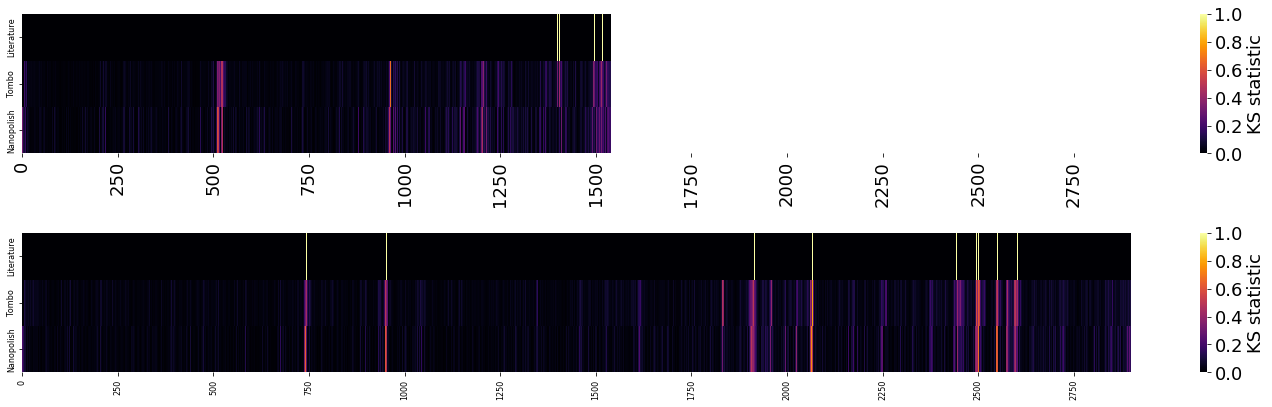

In [25]:
## plot of KS signal across all E. coli rRNA positions as horizontal heatmap with known modifications in a binarized comparison
import seaborn as sns

f, ax = plt.subplots(2,1, figsize=(20, 6), sharex=True)
xticks = np.arange(0,3000,250)

# heatmap1 - EC 16S
sns.heatmap(data = result_16.transpose(), square=False, ax=ax[0], cbar=True, cmap='inferno',\
            xticklabels=xticks, cbar_kws={'label':'KS statistic'})

ax[0].set_yticklabels(['Nanopolish', 'Tombo','Literature', ], rotation=90, ha='center', \
                   rotation_mode='anchor', fontsize=8)
ax[0].set_xticks(xticks)

# heatmap2 - EC 23S
sns.heatmap(data = result_23.transpose(), square=False, ax=ax[1], cbar=True, cmap='inferno', \
            xticklabels=xticks, cbar_kws={'label':'KS statistic'})
ax[1].set_yticklabels(['Nanopolish', 'Tombo','Literature', ], rotation=90, ha='center', \
                   rotation_mode='anchor', fontsize=8)

ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks, fontsize=8)
ax[0].set_ylim([0,3])
ax[1].set_ylim([0,3])
f.tight_layout()
#f.savefig('plots/heatmaps_ec_v1.pdf')

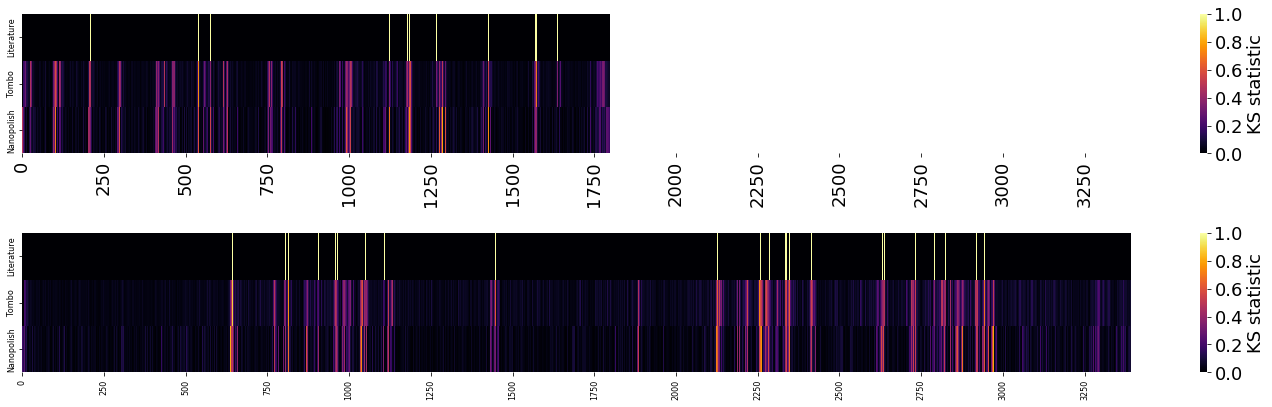

In [26]:
## plot of KS signal across all S. cerevisiae rRNA positions as horizontal heatmap with known modifications in a binarized comparison
f2, ax = plt.subplots(2,1, figsize=(20, 6), sharex=True)
xticks_sc = np.arange(0,3500,250)

# heatmap1 - SC 18S
sns.heatmap(data = result_18.transpose(), square=False, ax=ax[0], cbar=True, cmap='inferno',\
            xticklabels=xticks_sc, 
            cbar_kws={'label':'KS statistic'})
ax[0].set_yticklabels(['Nanopolish', 'Tombo','Literature', ], rotation=90, ha='center', \
                      rotation_mode='anchor', fontsize=8)
#ax[0].set_xticks(xticks_sc)

# heatmap1 - SC 25S
sns.heatmap(data = result_25.transpose(), square=False, ax=ax[1], cbar=True, cmap='inferno',\
            xticklabels=xticks_sc, \
            cbar_kws={'label':'KS statistic'})
ax[1].set_yticklabels(['Nanopolish', 'Tombo','Literature', ], rotation=90, ha='center', \
                   rotation_mode='anchor', fontsize=8)
ax[1].set_xticks(xticks_sc)

ax[1].set_xticklabels(xticks_sc, fontsize=8)
ax[0].set_ylim([0,3])
ax[1].set_ylim([0,3])
#ax[1].set_xlim(2000, 2400)
f2.tight_layout()
#f2.savefig('plots/heatmaps_sc_v1.pdf')

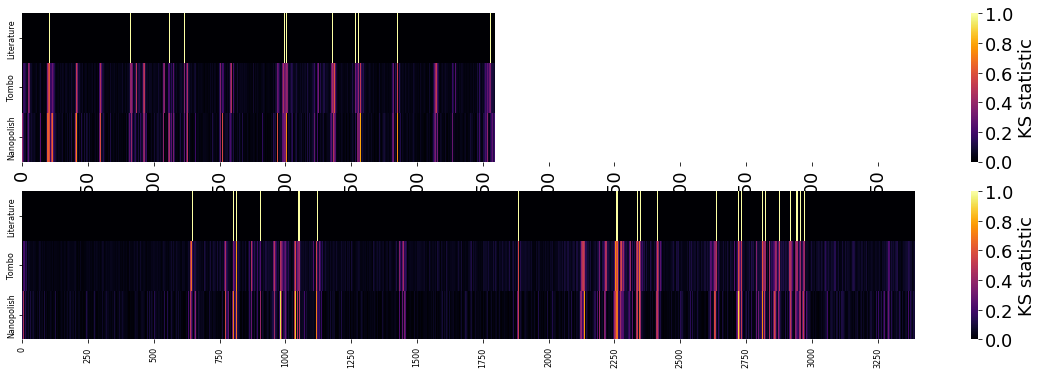

In [27]:
## plot of KS signal across all S. cerevisiae rRNA positions as horizontal heatmap with known modifications in a binarized comparison [different size]

f3, ax = plt.subplots(2,1, figsize=(20, 6), sharex=True)
xticks_sc = np.arange(0,3500,250)

# heatmap1 - SC 18S
sns.heatmap(data = result_18.transpose(), square=False, ax=ax[0], cbar=True, cmap='inferno',\
            xticklabels=xticks_sc, 
            cbar_kws={'label':'KS statistic'})
ax[0].set_yticklabels(['Nanopolish', 'Tombo','Literature', ], rotation=90, ha='center', \
                      rotation_mode='anchor', fontsize=8)
#ax[0].set_xticks(xticks_sc)

# heatmap1 - SC 25S
sns.heatmap(data = result_25.transpose(), square=False, ax=ax[1], cbar=True, cmap='inferno',\
            xticklabels=xticks_sc, \
            cbar_kws={'label':'KS statistic'})
ax[1].set_yticklabels(['Nanopolish', 'Tombo','Literature', ], rotation=90, ha='center', \
                   rotation_mode='anchor', fontsize=8)
ax[1].set_xticks(xticks_sc)

ax[1].set_xticklabels(xticks_sc, fontsize=8)
ax[0].set_ylim([0,3])
ax[1].set_ylim([0,3])
#ax[1].set_xlim(2000, 2400)
f2.tight_layout()
#f2.savefig('plots/heatmaps_sc_v1.pdf')

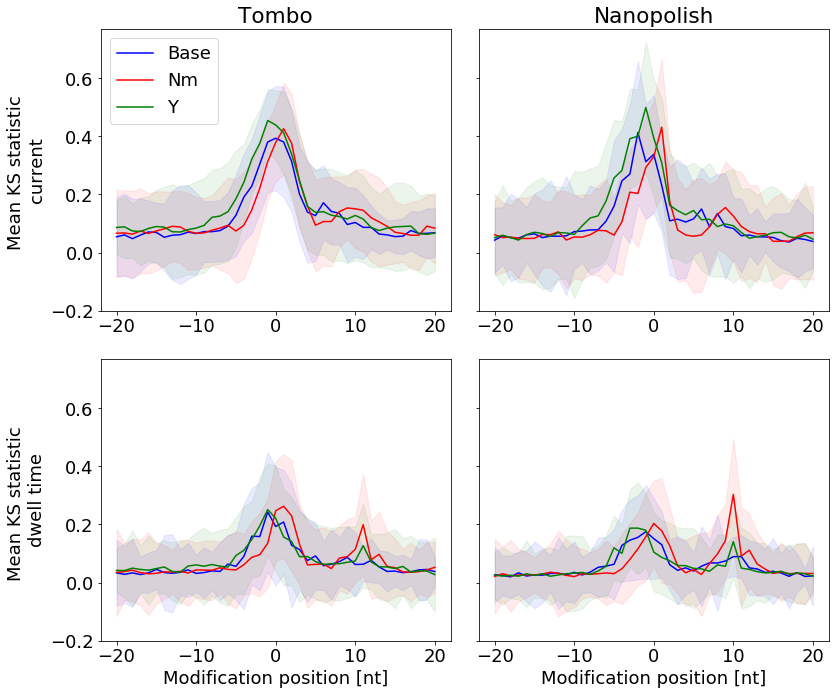

In [28]:
## function for getting the current signal KS profile within a specified region flanking and including a given particular modification site
def get_ks_prof_curr(mods_df, ks_df, chrom, seq, spec_mod, span, tombo_flag):
    df_chrom = mods_df[mods_df['chrom']==chrom]
    i = 0
    loc_list = []
    for modtype in df_chrom['modtype']:     ## loop over modtypes specified in the function arguments
        if spec_mod == modtype:
            loc_list.append(df_chrom['pos'].iloc[i])
        i+=1
    if span % 2 == 0:
        span = int(span)
        pass
    else:
        span = int(span+1)
    half_span = span // 2
    mod_list = []
    if tombo_flag == 1:
        for loc in loc_list:    
            p5_endlen = len(seq)-10-loc
            if (p5_endlen>half_span) and (loc>half_span): ## conditional on modification being far from 3' and 5'ends
                ind = ks_df[ks_df['pos']== loc].index.values.astype(int)[0]
                ind_left = ind-(half_span+1) # +1 to account for python slicing behavior. 
                ind_right = ind+half_span
                X = np.array(ks_df['stat'].iloc[ind_left:ind_right])
                mod_list.append(X)
        Y = np.transpose(mod_list)
    else:
        for loc in loc_list: 
            p5_endlen = len(seq)-10-loc
            if (p5_endlen>half_span) and (loc>half_span): ## conditional on modification being far from 3' and 5'ends
                ind = ks_df[ks_df['position']== loc].index.values.astype(int)[0]
                ind_left = ind-(half_span+1) # +1 to account for python slicing behavior. 
                ind_right = ind+half_span
                X = np.array(ks_df['ks_signal'].iloc[ind_left:ind_right])
                mod_list.append(X)
        Y = np.transpose(mod_list)
    
    return Y

## function for getting the dwell time KS profile within a specified region flanking and including a given particular modification site
def get_ks_prof_dwell(mods_df, ks_df, chrom, seq, spec_mod, span, tombo_flag):
    df_chrom = mods_df[mods_df['chrom']==chrom]
    i = 0
    loc_list = []
    for modtype in df_chrom['modtype']:
        if spec_mod == modtype:
            loc_list.append(df_chrom['pos'].iloc[i])
        i+=1
    if span % 2 == 0:
        span = int(span)
        pass
    else:
        span = int(span+1)
    half_span = span // 2
    mod_list = []
    if tombo_flag == 1:
        for loc in loc_list: 
            p5_endlen = len(seq)-10-loc
            if (p5_endlen>half_span) and (loc>half_span): ## conditional on modification being far from 3' and 5'ends
                ind = ks_df[ks_df['pos']== loc].index.values.astype(int)[0]
                ind_left = ind-(half_span+1) # +1 to account for python slicing behavior. 
                ind_right = ind+half_span
                X = np.array(ks_df['stat'].iloc[ind_left:ind_right])
                mod_list.append(X)
        Y = np.transpose(mod_list)
    else:
        for loc in loc_list: 
            p5_endlen = len(seq)-10-loc
            if (p5_endlen>half_span) and (loc>half_span): ## conditional on modification being far from 3' and 5'ends
                ind = ks_df[ks_df['position']== loc].index.values.astype(int)[0]
                ind_left = ind-(half_span+1) # +1 to account for python slicing behavior. 
                ind_right = ind+half_span
                X = np.array(ks_df['ks_dwell'].iloc[ind_left:ind_right])
                mod_list.append(X)
        Y = np.transpose(mod_list)
    
    return Y
  
span = 40

## tombo first

statprof_16d_Nm = get_ks_prof_dwell(rrna_mods, statd_16s, 'ec16s', seq16s, 'Nm', span, 1)
statprof_23d_Nm = get_ks_prof_dwell(rrna_mods, statd_23s, 'ec23s', seq23s, 'Nm', span, 1)
statprof_18d_Nm = get_ks_prof_dwell(rrna_mods, statd_18s, 'sc18s', seq18s, 'Nm', span, 1)
statprof_25d_Nm = get_ks_prof_dwell(rrna_mods, statd_25s, 'sc25s', seq25s, 'Nm', span, 1)


statprof_16d_Y = get_ks_prof_dwell(rrna_mods, statd_16s, 'ec16s', seq16s, 'Y', span, 1)
statprof_23d_Y = get_ks_prof_dwell(rrna_mods, statd_23s, 'ec23s', seq23s, 'Y', span, 1)
statprof_18d_Y = get_ks_prof_dwell(rrna_mods, statd_18s, 'sc18s', seq18s, 'Y', span, 1)
statprof_25d_Y = get_ks_prof_dwell(rrna_mods, statd_25s, 'sc25s', seq25s, 'Y', span, 1)


statprof_16d_base = get_ks_prof_dwell(rrna_mods, statd_16s, 'ec16s', seq16s, 'base', span, 1)
statprof_23d_base = get_ks_prof_dwell(rrna_mods, statd_23s, 'ec23s', seq23s, 'base', span, 1)
statprof_18d_base = get_ks_prof_dwell(rrna_mods, statd_18s, 'sc18s', seq18s, 'base', span, 1)
statprof_25d_base = get_ks_prof_dwell(rrna_mods, statd_25s, 'sc25s', seq25s, 'base', span, 1)

statprof_16i_Nm = get_ks_prof_curr(rrna_mods, stati_16s, 'ec16s', seq16s, 'Nm', span, 1)
statprof_23i_Nm = get_ks_prof_curr(rrna_mods, stati_23s, 'ec23s', seq23s, 'Nm', span, 1)
statprof_18i_Nm = get_ks_prof_curr(rrna_mods, stati_18s, 'sc18s', seq18s, 'Nm', span, 1)
statprof_25i_Nm = get_ks_prof_curr(rrna_mods, stati_25s, 'sc25s', seq25s, 'Nm', span, 1)

statprof_16i_Y = get_ks_prof_curr(rrna_mods, stati_16s, 'ec16s', seq16s, 'Y', span, 1)
statprof_23i_Y = get_ks_prof_curr(rrna_mods, stati_23s, 'ec23s', seq23s, 'Y', span, 1)
statprof_18i_Y = get_ks_prof_curr(rrna_mods, stati_18s, 'sc18s', seq18s, 'Y', span, 1)
statprof_25i_Y = get_ks_prof_curr(rrna_mods, stati_25s, 'sc25s', seq25s, 'Y', span, 1)

statprof_16i_base = get_ks_prof_curr(rrna_mods, stati_16s, 'ec16s', seq16s, 'base', span, 1)
statprof_23i_base = get_ks_prof_curr(rrna_mods, stati_23s, 'ec23s', seq23s, 'base', span, 1)
statprof_18i_base = get_ks_prof_curr(rrna_mods, stati_18s, 'sc18s', seq18s, 'base', span, 1)
statprof_25i_base = get_ks_prof_curr(rrna_mods, stati_25s, 'sc25s', seq25s, 'base', span, 1)

#### now nanopolish

statprof_np_16d_Nm = get_ks_prof_dwell(rrna_mods, nanop_16s, 'ec16s', seq16s, 'Nm', span, 0)
statprof_np_23d_Nm = get_ks_prof_dwell(rrna_mods, nanop_23s, 'ec23s', seq23s, 'Nm', span, 0)
statprof_np_18d_Nm = get_ks_prof_dwell(rrna_mods, nanop_18s, 'sc18s', seq18s, 'Nm', span, 0)
statprof_np_25d_Nm = get_ks_prof_dwell(rrna_mods, nanop_25s, 'sc25s', seq25s, 'Nm', span, 0)


statprof_np_16d_Y = get_ks_prof_dwell(rrna_mods, nanop_16s, 'ec16s', seq16s, 'Y', span, 0)
statprof_np_23d_Y = get_ks_prof_dwell(rrna_mods, nanop_23s, 'ec23s', seq23s, 'Y', span, 0)
statprof_np_18d_Y = get_ks_prof_dwell(rrna_mods, nanop_18s, 'sc18s', seq18s, 'Y', span, 0)
statprof_np_25d_Y = get_ks_prof_dwell(rrna_mods, nanop_25s, 'sc25s', seq25s, 'Y', span, 0)


statprof_np_16d_base = get_ks_prof_dwell(rrna_mods, nanop_16s, 'ec16s', seq16s, 'base', span, 0)
statprof_np_23d_base = get_ks_prof_dwell(rrna_mods, nanop_23s, 'ec23s', seq23s, 'base', span, 0)
statprof_np_18d_base = get_ks_prof_dwell(rrna_mods, nanop_18s, 'sc18s', seq18s, 'base', span, 0)
statprof_np_25d_base = get_ks_prof_dwell(rrna_mods, nanop_25s, 'sc25s', seq25s, 'base', span, 0)

statprof_np_16i_Nm = get_ks_prof_curr(rrna_mods, nanop_16s, 'ec16s', seq16s, 'Nm', span, 0)
statprof_np_23i_Nm = get_ks_prof_curr(rrna_mods, nanop_23s, 'ec23s', seq23s, 'Nm', span, 0)
statprof_np_18i_Nm = get_ks_prof_curr(rrna_mods, nanop_18s, 'sc18s', seq18s, 'Nm', span, 0)
statprof_np_25i_Nm = get_ks_prof_curr(rrna_mods, nanop_25s, 'sc25s', seq25s, 'Nm', span, 0)

statprof_np_16i_Y = get_ks_prof_curr(rrna_mods, nanop_16s, 'ec16s', seq16s, 'Y', span, 0)
statprof_np_23i_Y = get_ks_prof_curr(rrna_mods, nanop_23s, 'ec23s', seq23s, 'Y', span, 0)
statprof_np_18i_Y = get_ks_prof_curr(rrna_mods, nanop_18s, 'sc18s', seq18s, 'Y', span, 0)
statprof_np_25i_Y = get_ks_prof_curr(rrna_mods, nanop_25s, 'sc25s', seq25s, 'Y', span, 0)

statprof_np_16i_base = get_ks_prof_curr(rrna_mods, nanop_16s, 'ec16s', seq16s, 'base', span, 0)
statprof_np_23i_base = get_ks_prof_curr(rrna_mods, nanop_23s, 'ec23s', seq23s, 'base', span, 0)
statprof_np_18i_base = get_ks_prof_curr(rrna_mods, nanop_18s, 'sc18s', seq18s, 'base', span, 0)
statprof_np_25i_base = get_ks_prof_curr(rrna_mods, nanop_25s, 'sc25s', seq25s, 'base', span, 0)





base_cat_d = np.concatenate((statprof_16d_base, statprof_23d_base, statprof_18d_base, statprof_25d_base), axis=1)
y_cat_d  = np.concatenate((statprof_16d_Y, statprof_23d_Y, statprof_18d_Y, statprof_25d_Y), axis=1)
nm_cat_d = np.concatenate((statprof_16d_Nm, statprof_23d_Nm, statprof_18d_Nm, statprof_25d_Nm), axis=1)

base_cat_d_np = np.concatenate((statprof_np_16d_base, statprof_np_23d_base, statprof_np_18d_base, statprof_np_25d_base), axis=1)
y_cat_d_np  = np.concatenate((statprof_np_16d_Y, statprof_np_23d_Y, statprof_np_18d_Y, statprof_np_25d_Y), axis=1)
nm_cat_d_np = np.concatenate((statprof_np_16d_Nm, statprof_np_23d_Nm, statprof_np_18d_Nm, statprof_np_25d_Nm), axis=1)

base_cat_i = np.concatenate((statprof_16i_base, statprof_23i_base, statprof_18i_base, statprof_25i_base), axis=1)
y_cat_i  = np.concatenate((statprof_16i_Y, statprof_23i_Y, statprof_18i_Y, statprof_25i_Y), axis=1)
nm_cat_i = np.concatenate((statprof_16i_Nm, statprof_23i_Nm, statprof_18i_Nm, statprof_25i_Nm), axis=1)

base_cat_i_np = np.concatenate((statprof_np_16i_base, statprof_np_23i_base, statprof_np_18i_base, statprof_np_25i_base), axis=1)
y_cat_i_np  = np.concatenate((statprof_np_16i_Y, statprof_np_23i_Y, statprof_np_18i_Y, statprof_np_25i_Y), axis=1)
nm_cat_i_np = np.concatenate((statprof_np_16i_Nm, statprof_np_23i_Nm, statprof_np_18i_Nm, statprof_np_25i_Nm), axis=1)

#Nm_means_d   = np.mean(nm_cat_d, axis=1)
#base_means_d = np.mean(base_cat_d, axis=1)
#Y_means_d    = np.mean(y_cat_d, axis=1)
Nm_means_d   = np.median(nm_cat_d, axis=1)
base_means_d = np.median(base_cat_d, axis=1)
Y_means_d    = np.median(y_cat_d, axis=1)


Nm_means_d_np   = np.median(nm_cat_d_np, axis=1)
base_means_d_np = np.median(base_cat_d_np, axis=1)
Y_means_d_np    = np.median(y_cat_d_np, axis=1)

Nm_std_d   = np.std(nm_cat_d, axis=1)
base_std_d = np.std(base_cat_d, axis=1)
Y_std_d    = np.std(y_cat_d, axis=1)

Nm_std_d_np   = np.std(nm_cat_d_np, axis=1)
base_std_d_np = np.std(base_cat_d_np, axis=1)
Y_std_d_np    = np.std(y_cat_d_np, axis=1)
#print(np.percentile(nm_cat_d, [2.5, 50, 97.5]))


#Nm_means_i   = np.mean(nm_cat_i, axis=1)
#base_means_i = np.mean(base_cat_i, axis=1)
#Y_means_i    = np.mean(y_cat_i, axis=1)
Nm_means_i   = np.median(nm_cat_i, axis=1)
base_means_i = np.median(base_cat_i, axis=1)
Y_means_i    = np.median(y_cat_i, axis=1)

Nm_means_i_np   = np.median(nm_cat_i_np, axis=1)
base_means_i_np = np.median(base_cat_i_np, axis=1)
Y_means_i_np   = np.median(y_cat_i_np, axis=1)

Nm_std_i   = np.std(nm_cat_i, axis=1)
base_std_i = np.std(base_cat_i, axis=1)
Y_std_i    = np.std(y_cat_i, axis=1)

Nm_std_i_np   = np.std(nm_cat_i_np, axis=1)
base_std_i_np = np.std(base_cat_i_np, axis=1)
Y_std_i_np    = np.std(y_cat_i_np, axis=1)
x = np.arange(-span//2, span//2+1, 1)



## Plot the aggregated modification dependent current and dwell KS profiles, fill between values span the standard deviation of the KS profile at each position
axv_color = ['b', 'r', 'g']
axv_lw = 2

eband_alpha = 0.08

fig8, axs = plt.subplots(2,2, figsize=(12,10), sharey=True)
axs[0,0].plot(x, base_means_i, label='Base', color=axv_color[0])
axs[0,0].fill_between(x, base_means_i-base_std_i, base_means_i+base_std_i, alpha=eband_alpha, color=axv_color[0])
axs[0,0].plot(x, Nm_means_i, label='Nm', color=axv_color[1])
axs[0,0].fill_between(x, Nm_means_i-Nm_std_i, Nm_means_i+Nm_std_i, alpha=eband_alpha, color=axv_color[1])
axs[0,0].plot(x, Y_means_i, label='Y', color=axv_color[2])
axs[0,0].fill_between(x, Y_means_i-Y_std_i, Y_means_i+Y_std_i, alpha=eband_alpha, color=axv_color[2])
#axs[0].set_title('Current, i')

axs[1,0].plot(x, base_means_d, label='Base', color=axv_color[0])
axs[1,0].fill_between(x, base_means_d-base_std_d, base_means_d+base_std_d, alpha=eband_alpha, color=axv_color[0])
axs[1,0].plot(x, Nm_means_d, label='Nm', color=axv_color[1])
axs[1,0].fill_between(x, Nm_means_d-Nm_std_d, Nm_means_d+Nm_std_d, alpha=eband_alpha, color=axv_color[1])
axs[1,0].plot(x, Y_means_d, label='Y', color=axv_color[2])
axs[1,0].fill_between(x, Y_means_d-Y_std_d, Y_means_d+Y_std_d, alpha=eband_alpha, color=axv_color[2])

axs[0,1].plot(x, base_means_i_np, label='Base', color=axv_color[0])
axs[0,1].fill_between(x, base_means_i_np-base_std_i_np, base_means_i_np+base_std_i_np, alpha=eband_alpha, color=axv_color[0])
axs[0,1].plot(x, Nm_means_i_np, label='Nm', color=axv_color[1])
axs[0,1].fill_between(x, Nm_means_i_np-Nm_std_i_np, Nm_means_i_np+Nm_std_i_np, alpha=eband_alpha, color=axv_color[1])
axs[0,1].plot(x, Y_means_i_np, label='Y', color=axv_color[2])
axs[0,1].fill_between(x, Y_means_i_np-Y_std_i_np, Y_means_i_np+Y_std_i_np, alpha=eband_alpha, color=axv_color[2])
#axs[0].set_title('Current, i')

axs[1,1].plot(x, base_means_d_np, label='Base', color=axv_color[0])
axs[1,1].fill_between(x, base_means_d_np-base_std_d_np, base_means_d_np+base_std_d_np, alpha=eband_alpha, color=axv_color[0])
axs[1,1].plot(x, Nm_means_d_np, label='Nm', color=axv_color[1])
axs[1,1].fill_between(x, Nm_means_d_np-Nm_std_d_np, Nm_means_d_np+Nm_std_d_np, alpha=eband_alpha, color=axv_color[1])
axs[1,1].plot(x, Y_means_d_np, label='Y', color=axv_color[2])
axs[1,1].fill_between(x, Y_means_d_np-Y_std_d_np, Y_means_d_np+Y_std_d_np, alpha=eband_alpha, color=axv_color[2])


#axs[1].set_title('Dwell time, t')


axs[0,0].set_ylabel('Mean KS statistic \ncurrent')
axs[1,0].set_ylabel('Mean KS statistic \ndwell time')

#axs[0,0].legend('Tombo')
#axs[0,1].legend('Nanopolish')
#for axs in axs:
axs[0,0].legend(loc='upper left')
axs[1,0].set_xlabel('Modification position [nt]')
axs[1,1].set_xlabel('Modification position [nt]')
axs[0,0].set_title('Tombo')
axs[0,1].set_title('Nanopolish')
fig8.tight_layout()
#fig8.savefig('plots/ks_prof_v2.pdf')

In [29]:
df_16s = pd.DataFrame({'pos':nanop_16s['position'], 'np_ks_i':nanop_16s['ks_signal'], 'np_ks_d':nanop_16s['ks_dwell']})
df_16s = df_16s.merge(stati_16s, on='pos')
df_16s.rename(columns={'stat':'t_ks_i'}, inplace=True)
df_16s = df_16s.merge(statd_16s, on='pos')
df_16s.rename(columns={'stat':'t_ks_d'}, inplace=True)

df_23s = pd.DataFrame({'pos':nanop_23s['position'], 'np_ks_i':nanop_23s['ks_signal'], 'np_ks_d':nanop_23s['ks_dwell']})
df_23s = df_23s.merge(stati_23s, on='pos')
df_23s.rename(columns={'stat':'t_ks_i'}, inplace=True)
df_23s = df_23s.merge(statd_23s, on='pos')
df_23s.rename(columns={'stat':'t_ks_d'}, inplace=True)

df_18s = pd.DataFrame({'pos':nanop_18s['position'], 'np_ks_i':nanop_18s['ks_signal'], 'np_ks_d':nanop_18s['ks_dwell']})
df_18s = df_18s.merge(stati_18s, on='pos')
df_18s.rename(columns={'stat':'t_ks_i'}, inplace=True)
df_18s = df_18s.merge(statd_18s, on='pos')
df_18s.rename(columns={'stat':'t_ks_d'}, inplace=True)

df_25s = pd.DataFrame({'pos':nanop_25s['position'], 'np_ks_i':nanop_25s['ks_signal'], 'np_ks_d':nanop_25s['ks_dwell']})
df_25s = df_25s.merge(stati_25s, on='pos')
df_25s.rename(columns={'stat':'t_ks_i'}, inplace=True)
df_25s = df_25s.merge(statd_25s, on='pos')
df_25s.rename(columns={'stat':'t_ks_d'}, inplace=True)

In [30]:
nanop_16s.head(10)

,contig,position,kmer,num_reads_ivt,num_reads_native,ks_signal,ks_signal_pval,ttest_signal,ttest_signal_pval,signal_shapiro_ivt,...,ks_dwell,ks_dwell_pval,ttest_dwell,ttest_dwell_pval,dwell_mean_ivt,dwell_mean_native,dwell_median_ivt,dwell_median_native,dwell_std_ivt,dwell_std_native
0,ecoli16S,1,AAAUU,13,7411,0.234651,4.091506e-01,-1.130784,2.801822e-01,0.802337,...,0.262583,2.800483e-01,-1.012976,3.310606e-01,97.967692,15.070421,11.620000,11.29,295.059447,26.518299
1,ecoli16S,2,AAUUG,18,10254,0.176354,6.312919e-01,0.582923,5.675834e-01,0.898993,...,0.171965,6.626605e-01,1.666428,1.136593e-01,8.429444,10.750003,6.640000,7.97,5.884681,12.522489
2,ecoli16S,3,AUUGA,20,11543,0.319012,3.437069e-02,-1.919930,6.998212e-02,0.958001,...,0.441276,8.397852e-04,1.028865,3.164243e-01,10.972500,13.993347,4.315000,11.29,13.120499,12.384300
3,ecoli16S,4,UUGAA,20,11483,0.448746,6.440296e-04,-1.474917,1.565814e-01,0.837069,...,0.241740,1.937418e-01,-1.321952,2.018769e-01,26.659000,11.853921,8.465000,9.29,50.082730,12.118868
4,ecoli16S,5,UGAAG,50,11377,0.115203,5.234301e-01,0.545260,5.880240e-01,0.981126,...,0.353490,7.907318e-06,-2.881133,5.861694e-03,22.753600,9.442855,13.940000,7.30,32.657485,12.569346
5,ecoli16S,6,GAAGA,532,11371,0.161537,6.053930e-12,-2.891179,3.986173e-03,0.993819,...,0.410210,1.046418e-74,-5.374312,1.150162e-07,49.625996,10.893721,18.925000,8.30,165.982272,41.829738
6,ecoli16S,7,AAGAG,1349,11312,0.092212,2.507757e-09,-1.815799,6.959331e-02,0.969580,...,0.323020,1.167698e-109,-13.842160,7.438157e-41,27.435011,9.187675,13.940000,6.98,48.355112,7.110371
7,ecoli16S,8,AGAGU,66220,11176,0.089909,1.450037e-67,-5.524502,3.367767e-08,0.968954,...,0.520030,0.000000e+00,-157.330713,0.000000e+00,49.954794,10.691091,31.530001,7.31,59.032559,10.388105
8,ecoli16S,9,GAGUU,149073,11583,0.101325,2.850816e-96,-9.169473,5.487356e-20,0.982773,...,0.329719,0.000000e+00,-51.362547,0.000000e+00,29.889063,12.158430,18.920000,8.63,40.873446,35.362418
9,ecoli16S,10,AGUUU,233142,14933,0.160165,3.934436e-313,-34.861040,7.575842e-257,0.945080,...,0.289304,0.000000e+00,-96.368992,0.000000e+00,31.126669,12.539419,16.600000,9.63,41.465687,21.104365


In [31]:
## calculate spearman correlations between the KS profiles from current and dwell form tombo and nanopolish
corr00 = scipy.stats.spearmanr(df_16s['np_ks_i'], df_16s['t_ks_i'])
corr10 = scipy.stats.spearmanr(df_23s['np_ks_i'], df_23s['t_ks_i'])
corr20 = scipy.stats.spearmanr(df_18s['np_ks_i'], df_18s['t_ks_i'])
corr30 = scipy.stats.spearmanr(df_25s['np_ks_i'], df_25s['t_ks_i'])
corr01 = scipy.stats.spearmanr(df_16s['np_ks_d'], df_16s['t_ks_d'])
corr11 = scipy.stats.spearmanr(df_23s['np_ks_d'], df_23s['t_ks_d'])
corr21 = scipy.stats.spearmanr(df_18s['np_ks_d'], df_18s['t_ks_d']) 
corr31 = scipy.stats.spearmanr(df_25s['np_ks_d'], df_25s['t_ks_d'])

print(corr00, corr10, corr20, corr30)
print(corr01, corr11, corr21, corr31)

SpearmanrResult(correlation=0.55619557785005791, pvalue=4.7300696183349065e-125) SpearmanrResult(correlation=0.57763546189428017, pvalue=3.624577205824968e-257) SpearmanrResult(correlation=0.64136826022566229, pvalue=5.2286764118639597e-208) SpearmanrResult(correlation=0.49073183625683636, pvalue=1.1255366869195026e-204)
SpearmanrResult(correlation=0.31495971531847106, pvalue=1.325578045871011e-36) SpearmanrResult(correlation=0.35563905004040719, pvalue=5.3687076730640965e-87) SpearmanrResult(correlation=0.41382138628964238, pvalue=5.3608521619282985e-75) SpearmanrResult(correlation=0.37584341370139229, pvalue=4.8978486206844576e-114)


In [32]:
## Calculate pearson correlations between the KS profiles from current and dwell form tombo and nanopolish
corr00 = scipy.stats.pearsonr(df_16s['np_ks_i'], df_16s['t_ks_i'])
corr10 = scipy.stats.pearsonr(df_23s['np_ks_i'], df_23s['t_ks_i'])
corr20 = scipy.stats.pearsonr(df_18s['np_ks_i'], df_18s['t_ks_i'])
corr30 = scipy.stats.pearsonr(df_25s['np_ks_i'], df_25s['t_ks_i'])
corr01 = scipy.stats.pearsonr(df_16s['np_ks_d'], df_16s['t_ks_d'])
corr11 = scipy.stats.pearsonr(df_23s['np_ks_d'], df_23s['t_ks_d'])
corr21 = scipy.stats.pearsonr(df_18s['np_ks_d'], df_18s['t_ks_d']) 
corr31 = scipy.stats.pearsonr(df_25s['np_ks_d'], df_25s['t_ks_d'])

print(corr00, corr10, corr20, corr30)
print(corr01, corr11, corr21, corr31)

(0.75250656528879944, 1.2307751648513748e-279) (0.79179499504496997, 0.0) (0.77485477901693312, 0.0) (0.78486184775761614, 0.0)
(0.44795088294276575, 1.9750672505837828e-76) (0.48471572458865653, 2.2886782042609347e-170) (0.46568747063161914, 4.9747252281940092e-97) (0.54768554152723792, 2.6565168486691139e-264)
